# <u>1. Introduction

For this project, we have been presented with the data of two radioactive sources: NPRL597 and Europium-152. Each data set contains the channel, the number of counts, and the energy in keV. This data originates from a digital spectrometer being placed near a sample of radioactive waste, where the number of counts were recorded in each channel of the spectrometer.

As part of this project, we were assigned a channel width of 450-1000 for NPRL597, where the three most prominent peaks in this region had to be investigated. The same process was then applied for Eu-152, but with the most prominent peak investigated, between a channel range of 450-1000.
\newline The purpose of this project is to utilise the data to understand the concept of the 'Minimum Detectable Activity' (MDA). This is a statistic which is commonly used in nuclear physics - it is the lowest level of activity (in Bq) which can be be detected by a specific detector. The MDA is dependent on the detector's efficiency and the relative strength of the background to the signal.

### 1.1 The Critical Limit
The Critical Limit $L_{C}$, is a statistic we use to assess whether a net count is valid. For example, we could set a limit above X amount of standard deviations of the distribution of counts, where we would be confident in the count existing.
\
So if the number of net counts, N, agreed with $N>K_{\alpha}\sigma_{0}$, then the count would be statistically significant. If the opposite was true ($N\le K_{\alpha}\sigma_{0}$), then the count would not be statistically signficant. $K_{\alpha}$ is a factor chosen such that it provides a level of pre-determined degree of confidence in our conclusions. 

Since in this report, we are using a one-tailed probability distribution at the 95% confidence limit, then our value of $K_{\alpha}$ becomes $1.645\sigma_{0}$, so therefore $L_{C} = 1.645\sigma_{0}$.
\ If the net count is at or below $L_{C}$, then the sample is concluded to be inactive and an upper-limit is is quoted. If the net count is above the critical limit, then activity is detected and we are able to specify a value of the activity with an associated uncertainty, depending on the confidence limit that is used.
The standard deviation of the net count distribution, when there is zero activity, is obtained from measuring the backgorund and using the concept of Poisson statistics, where the variance of the number of counts is equal to the number of counts.

The net count due to the sample (without background noise) is given by: $N=C-B$ where C is the number of counts with the sample, and B is the background count.
The variance can then be given by: $\sigma^{2}(N) = \sigma^{2}(C) + \sigma^{2}(B) = C + \sigma^{2}(B) = N + B + \sigma^{2}(B)$.

Since $\sigma^{2}(C) = C =  N+B$, then when N is approximately zero, the square of the standard deviation of N becomes $\sigma^{2}_{0}$. For a single count, $\sigma^{2}(B)$ becomes B, so $\sigma^{2}_{0}=2B$;
therefore $L_{C} = 2.33\sigma(B)$.

### 1.2 The Detection Limit

The detection limit $L_{D}$ tells us how many counts are required for a certain probability of detection. If we had a sample activity that was centred on the critical limit, then we would obtain a significant result in only 50% of cases since the counts are symmetrically distributed around $L_{c}$. From this, we know that the detection limit be greater than $L_{C}$ and if we assume we have a sample with an activity exactly at $L_{C}$, then under repeated measurements, the count distribution would have a standard deviation $\sigma_{D}$.

The chance of not detecting any activity when really there is activity can be defined as $L_{D} = K_{\alpha} \sigma_{0} + K_{\beta}\sigma_{D}$, where $K_{\beta}$ is a fractional area used to define the degree of certainty. If we take both $\alpha$ and $\beta$ to be 5%, then both $K_{\alpha}$ and $K_{\beta}$ is equal to 1.645. By considering the single-count method where net count equals the detection limit, such that $N=C-B=L_{D}$, then:
* The variance is $\sigma^{2} = C+B$
* At the detection limit, $C = L_{D} + B$
* $\sigma^{2}_{0} = 2B$
* Therefore, $\sigma^{2}_{D} = L_{D} + \sigma^{2}_{0}$

By using these relationships, we can rewrite the equation for the detection limit as $L_{D} = K_{\alpha}\sigma_{0} + K_{\alpha}\sqrt{L_{D} + \sigma^{2}_{0}}$. This therefore means that $L_{D} = K^{2}_{\alpha} + 2K_{\alpha}\sigma_{0} = 2.71 + 4.65\sqrt{B}$, if we consider that $K_{\alpha}$ = 1.645 and $\sigma^{2}_{0}=2B$.

### 1.3 Minimum Detectable Activity (MDA)

As mentioned previously, the MDA is an important statistic which is essentially the minimum amount of radioactive nuclide from which we would obtain a significant count in a specific time with a confidence level. The MDA is often expressed as an activity (Bq). In order to calculate this value, we first convert the detection limit into a count rate (by dividing by time), and then also take into account the detector efficiency $\epsilon$, and branching ratio, f, of the activity that is related to the radiation that is being measured.

The MDA is given as: $MDA = \frac{L_{D}}{t\epsilon f}$

# <u> 2. Methodlogy

To analyse our peaks of the NPRL, we first selected the channel region specified to us, and identified the most prominent three peaks. We then utilised a combined Gaussian and linear fit, such that the fitted ampltidude, mean, standard deviation, gradient, and constant, where returned. Using this data, we were able to then able to calculate the number of net counts, the critical limit (at 95% confidence), the detection limit, and the MDA, using the equations derive in our introduction.

A similar process was used for Eu-152 using the 1-800 channel region, however, we only identified the most prominent peak for this dataset. We fitted this peak using the same combined function, returning the same fitted parameters as was returned for the NPRL597, and the values of the critical limit, detection limit, and MDA determined. 

# <u> 3. Results

Please note that I am unable to add images via. markdown (the images do not appear) and thus have had to include the code within this report.

## 3.1 - NPRL597

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
with h5py.File('NPRL597.h5', 'r') as file:
    varList= list(file)
    print("loaded the variables:", varList)
    locals().update({var:file[var][:] for var in list(file)})
    e = np.array(file['energy1']) #x-axis
    c=np.array(file['count1']) #y-axis
    channel = np.array(file['channel1']) 

loaded the variables: ['channel1', 'count1', 'energy1']


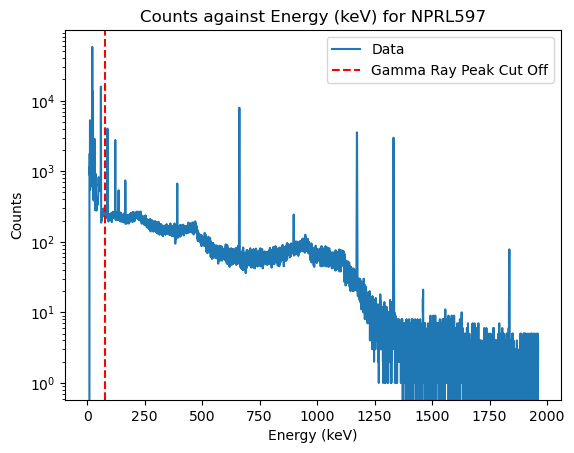

In [112]:
plt.semilogy(e,c, label = 'Data')
plt.axvline(77, color='r', linestyle = '--', label = 'Gamma Ray Peak Cut Off')
plt.legend()
plt.title('Counts against Energy (keV) for NPRL597')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.savefig('NPRL597 Data.PNG')
plt.show()

Figure 1: The counts of the NPRL597 source in dependence of the energy (in keV). The blue lines shows the data, with prominent peaks consistently appearing throughout the distribution. The dashed red line represents the 77keV limit - peaks below this threshold represent X-Rays and not gamma peaks, which we are investigating.

Data range we are focusing on for NPRL597 is: 450-1000 

In [113]:
channel_range = channel[449:1000] #always n-1
print(channel_range)

[ 450  451  452  453  454  455  456  457  458  459  460  461  462  463
  464  465  466  467  468  469  470  471  472  473  474  475  476  477
  478  479  480  481  482  483  484  485  486  487  488  489  490  491
  492  493  494  495  496  497  498  499  500  501  502  503  504  505
  506  507  508  509  510  511  512  513  514  515  516  517  518  519
  520  521  522  523  524  525  526  527  528  529  530  531  532  533
  534  535  536  537  538  539  540  541  542  543  544  545  546  547
  548  549  550  551  552  553  554  555  556  557  558  559  560  561
  562  563  564  565  566  567  568  569  570  571  572  573  574  575
  576  577  578  579  580  581  582  583  584  585  586  587  588  589
  590  591  592  593  594  595  596  597  598  599  600  601  602  603
  604  605  606  607  608  609  610  611  612  613  614  615  616  617
  618  619  620  621  622  623  624  625  626  627  628  629  630  631
  632  633  634  635  636  637  638  639  640  641  642  643  644  645
  646 

In [114]:
lower_limit = 0.2393*(450)-0.2464
upper_limit = 0.2393*(1000)-0.2464

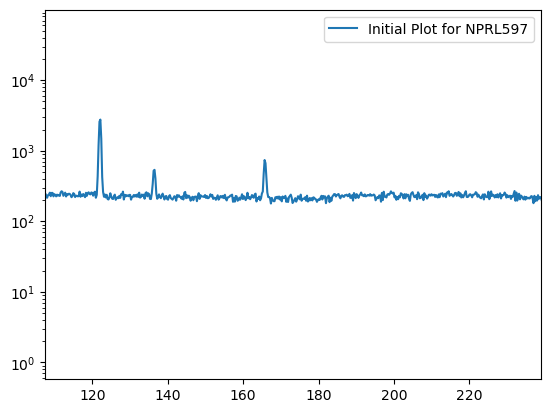

In [115]:
plt.semilogy(e,c, label = 'Initial Plot for NPRL597')
plt.legend()
#plt.axvline(77, color='r', linestyle = '--', label = 'Gamma Ray Peak Cut Off')
plt.xlim(lower_limit, upper_limit)
plt.show()

Figure 2: The graph shows the energy interval we are investigating, in accordance to the channel region which was assigned to us individually. There are three prominent peaks within this region which we wish to investigate.

FWHM = $2\sqrt{2ln2}\sigma$

In [116]:
#Define a FWHM function:
#Zoom into plot to find range
def FWHM(sigma):
    fwhm = 2*np.sqrt(2*np.log(2))*sigma
    return fwhm

### <u> First Peak

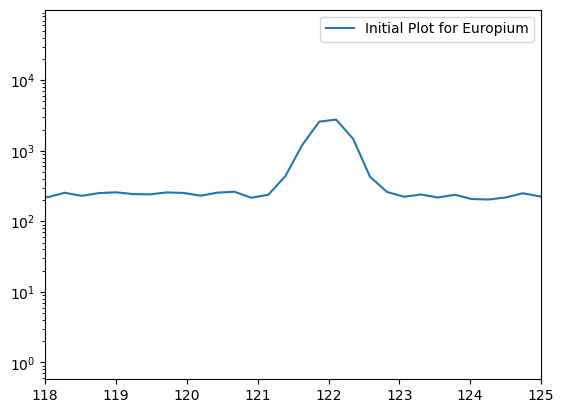

In [117]:
plt.semilogy(e,c, label = 'Initial Plot for Europium')
plt.legend()
plt.xlim(118, 125)
plt.show()

### <u> Second Peak

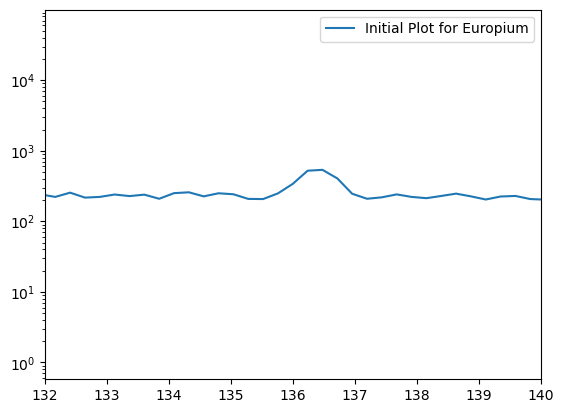

In [118]:
plt.semilogy(e,c, label = 'Initial Plot for Europium')
plt.legend()
plt.xlim(132, 140)
plt.show()

### <u> Third Peak

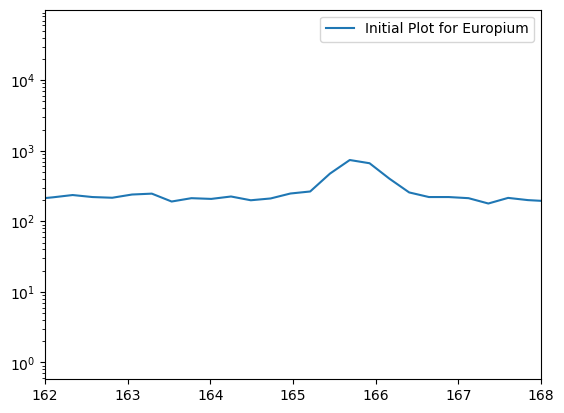

In [119]:
plt.semilogy(e,c, label = 'Initial Plot for Europium')
plt.legend()
plt.xlim(162, 168)
plt.show()

### First Peak Fit

In [120]:
def Gaussian_Peak(e,m,const,A,mu,sigma): #Remember that 'e' is the x-axis.
    g = A*np.exp((-(e-mu)**2)/(2*sigma**2))
    y=m*(e-mu) + const
    return g+y

In [121]:
print(e[502])
print(e[518])

120.1919856
124.0230207


<ErrorbarContainer object of 3 artists>

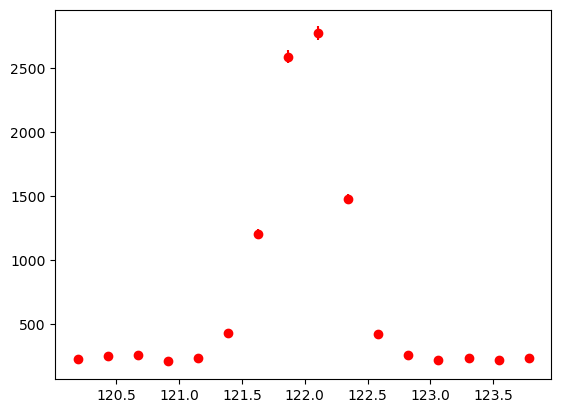

In [122]:
e1 = e[502:518]
c1=c[502:518]
dy = np.sqrt(c1)
#print(e1, dy)
plt.errorbar(e1,c1,yerr=dy, fmt='o', color='r')

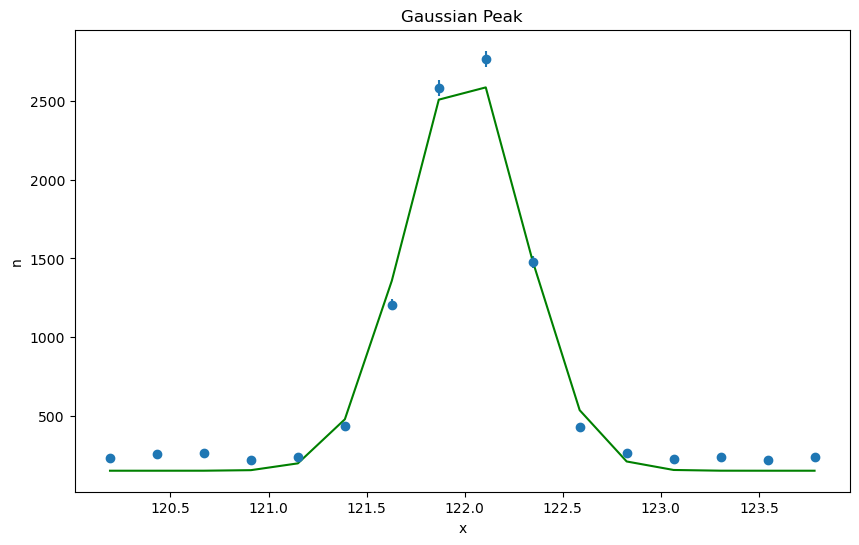

Correlation matrix is:
[[ 1.   -0.2  -0.24 -0.68  0.26]
 [-0.2   1.   -0.37 -0.2   0.3 ]
 [-0.24 -0.37  1.    0.88 -1.  ]
 [-0.68 -0.2   0.88  1.   -0.88]
 [ 0.26  0.3  -1.   -0.88  1.  ]]
Amplitude (A) = 2735.3852 +- 53.9190
Mean (mu) = 122.0069 +- 0.0047
Standard Deviation (sigma) = 0.2630 +- 0.0041
Constant (background) = 233.2759 +- 6.2816
Gradient (background) = -3.8078 +- 4.5236


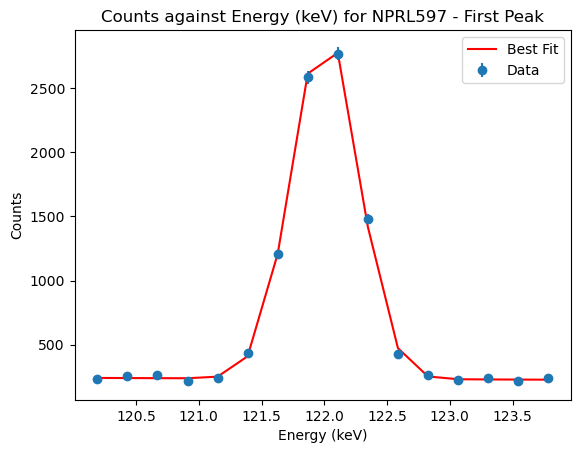

In [123]:
from scipy.optimize import curve_fit
initial_parameters = [0,150,2600,122,0.3]
dy = np.sqrt(c1)
# Plot the data
plt.figure(figsize=(10, 6))
plt.errorbar(e1, c1, yerr=dy, fmt='o', label='Data')
plt.plot(e1, Gaussian_Peak(e1,0,150,2600,122,0.3), label='Initial Guess', color = 'g')
plt.title("Gaussian Peak")
plt.xlabel("x")
plt.ylabel("n")
plt.show()
popt, pcov = curve_fit(Gaussian_Peak, e1, c1, sigma=dy, p0=initial_parameters,maxfev=10000)
m_fit, const_fit, A_fit, mu_fit, sigma_fit = popt

with np.printoptions(precision=2):
    pcorr = np.corrcoef(pcov, rowvar=False)
    print("Correlation matrix is:")
    print(pcorr)
    
m_sigma, const_sigma, A_sigma, mu_sigma, sigma_sigma = np.sqrt(np.diag(pcov))

print("Amplitude (A) = {:.4f} +- {:.4f}".format(A_fit, A_sigma))
print("Mean (mu) = {:.4f} +- {:.4f}".format(mu_fit, mu_sigma))
print("Standard Deviation (sigma) = {:.4f} +- {:.4f}".format(sigma_fit, sigma_sigma))
print("Constant (background) = {:.4f} +- {:.4f}".format(const_fit, const_sigma))
print("Gradient (background) = {:.4f} +- {:.4f}".format(m_fit, m_sigma))  
plt.plot(e1, Gaussian_Peak(e1,m_fit, const_fit, A_fit, mu_fit, sigma_fit), label='Best Fit', color = 'r')
plt.errorbar(e1, c1, yerr=dy, fmt='o', label='Data')
plt.title('Counts against Energy (keV) for NPRL597 - First Peak')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.savefig('NPRL597 First Peak.PNG')
plt.legend()
plt.show()

Figure 3: The number of counts of the NPRL597 source, in dependence of the energy (keV), for the first peak within our channel region. The red line shows the fitted data in accordance to a combined model containing a Gaussian and Linear relationship, and the blue dots showing the datapoints with the uncertainty. The parameters we are interested in $\mu$ and $\sigma$, were found to be (121.7331 +- 0.0015)keV and (0.2624 +- 0.0012)keV, respectively.

### Second Peak Fit

In [124]:
e2 = e[560:580]
c2=c[560:580]
dy = np.sqrt(c2)
print(e2)

[134.079488  134.3189277 134.5583674 134.7978071 135.0372467 135.2766864
 135.5161261 135.7555658 135.9950055 136.2344452 136.4738849 136.7133246
 136.9527643 137.192204  137.4316437 137.6710834 137.9105231 138.1499628
 138.3894025 138.6288422]


<ErrorbarContainer object of 3 artists>

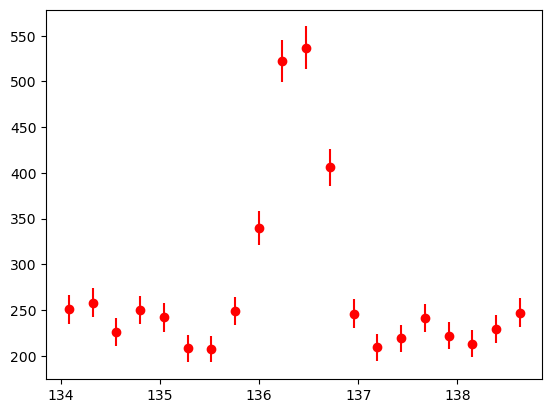

In [125]:
plt.errorbar(e2,c2,yerr=dy, fmt='o', color='r')

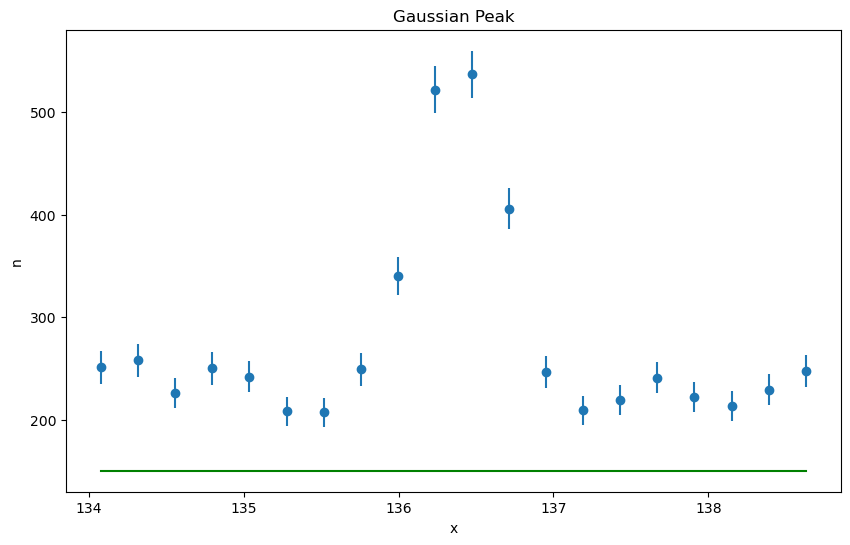

Correlation matrix is:
[[ 1.   -0.07 -0.24 -0.95  0.29]
 [-0.07  1.   -0.66 -0.    0.53]
 [-0.24 -0.66  1.    0.06 -0.99]
 [-0.95 -0.    0.06  1.   -0.07]
 [ 0.29  0.53 -0.99 -0.07  1.  ]]
Amplitude (A) = 342.0438 +- 22.7084
Mean (mu) = 136.3891 +- 0.0179
Standard Deviation (sigma) = 0.2613 +- 0.0175
Constant (background) = 228.2221 +- 4.6142
Gradient (background) = -3.2871 +- 2.8588


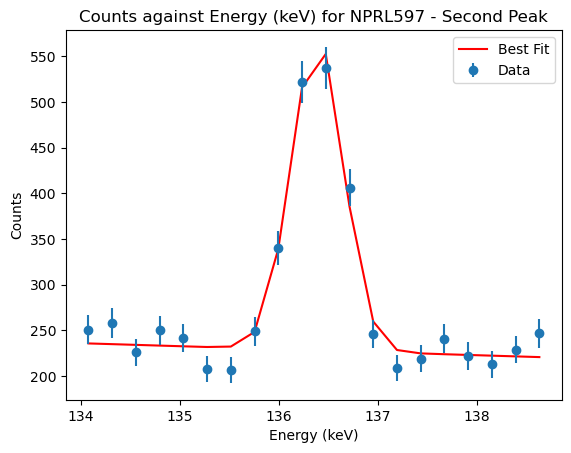

In [126]:
from scipy.optimize import curve_fit
initial_parameters = [0,250,550,136,0.3]
dy = np.sqrt(c2)
# Plot the data
plt.figure(figsize=(10, 6))
plt.errorbar(e2, c2, yerr=dy, fmt='o', label='Data')
plt.plot(e2, Gaussian_Peak(e2,0,150,2500,122,0.3), label='Initial Guess', color = 'g')
plt.title("Gaussian Peak")
plt.xlabel("x")
plt.ylabel("n")
plt.show()
popt, pcov = curve_fit(Gaussian_Peak, e2, c2, sigma=dy, p0=initial_parameters,maxfev=10000)
m_fit, const_fit, A_fit, mu_fit, sigma_fit = popt

with np.printoptions(precision=2):
    pcorr = np.corrcoef(pcov, rowvar=False)
    print("Correlation matrix is:")
    print(pcorr)
    
m_sigma, const_sigma, A_sigma, mu_sigma, sigma_sigma = np.sqrt(np.diag(pcov))

print("Amplitude (A) = {:.4f} +- {:.4f}".format(A_fit, A_sigma))
print("Mean (mu) = {:.4f} +- {:.4f}".format(mu_fit, mu_sigma))
print("Standard Deviation (sigma) = {:.4f} +- {:.4f}".format(sigma_fit, sigma_sigma))
print("Constant (background) = {:.4f} +- {:.4f}".format(const_fit, const_sigma))  
print("Gradient (background) = {:.4f} +- {:.4f}".format(m_fit, m_sigma))  

plt.plot(e2, Gaussian_Peak(e2,m_fit, const_fit, A_fit, mu_fit, sigma_fit), label='Best Fit', color = 'r')
plt.errorbar(e2, c2, yerr=dy, fmt='o', label='Data')
plt.title('Counts against Energy (keV) for NPRL597 - Second Peak')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.savefig('NPRL597 Second Peak.PNG')
plt.legend()
plt.show()

Figure 4: The number of counts of the NPRL597 source, in dependence of the energy (keV), for the second peak within our channel region. The red line shows the fitted data in accordance to a combined model containing a Gaussian and Linear relationship, and the blue dots showing the datapoints with the uncertainty. The parameters we are interested in $\mu$ and $\sigma$, were found to be (136.3891 +- 0.0179)keV and (0.2613 +- 0.0175)keV, respectively.

### Third Peak

In [127]:
e3 = e[680:703]
c3=c[680:703]
dy = np.sqrt(c3)
print(e3)

[162.8122515 163.0516912 163.2911309 163.5305706 163.7700103 164.00945
 164.2488897 164.4883294 164.7277691 164.9672088 165.2066485 165.4460882
 165.6855278 165.9249675 166.1644072 166.4038469 166.6432866 166.8827263
 167.122166  167.3616057 167.6010454 167.8404851 168.0799248]


<ErrorbarContainer object of 3 artists>

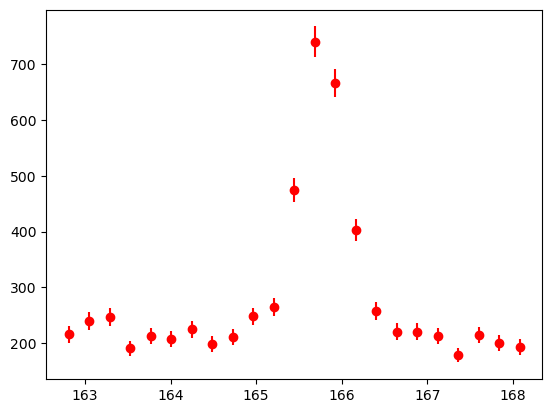

In [128]:
plt.errorbar(e3,c3,yerr=dy, fmt='o', color='r')

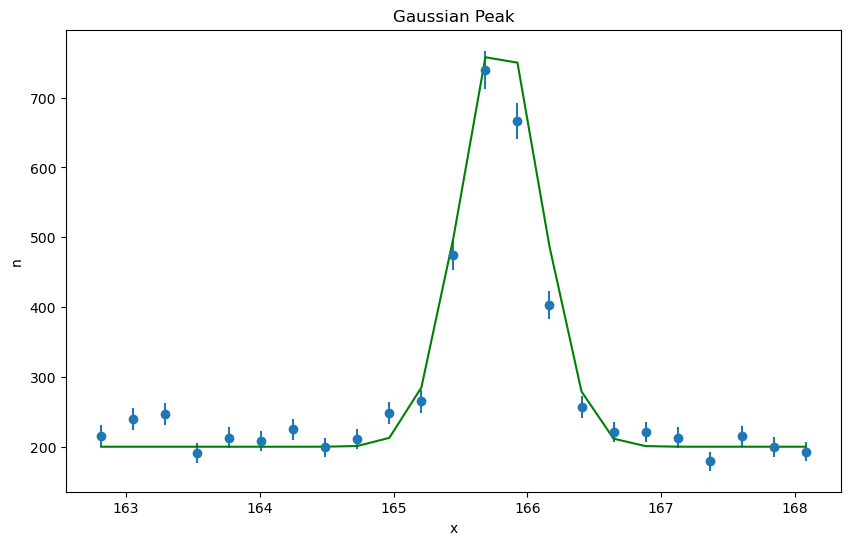

Correlation matrix is:
[[ 1.    0.43 -0.5  -0.43  0.49]
 [ 0.43  1.   -0.64  0.07  0.56]
 [-0.5  -0.64  1.   -0.53 -1.  ]
 [-0.43  0.07 -0.53  1.    0.57]
 [ 0.49  0.56 -1.    0.57  1.  ]]
Amplitude (A) = 542.9684 +- 24.3089
Mean (mu) = 165.7740 +- 0.0119
Standard Deviation (sigma) = 0.2741 +- 0.0114
Constant (background) = 210.2908 +- 4.0031
Gradient (background) = -3.9379 +- 2.1219


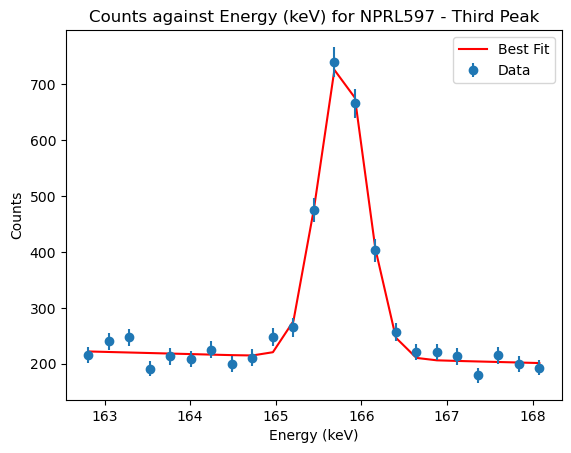

In [129]:
from scipy.optimize import curve_fit
initial_parameters = [-3,200,600,165.8,0.3]
dy = np.sqrt(c3)
# Plot the data
plt.figure(figsize=(10, 6))
plt.errorbar(e3, c3, yerr=dy, fmt='o', label='Data')
plt.plot(e3, Gaussian_Peak(e3,0,200,600,165.8,0.3), label='Initial Guess', color = 'g')
plt.title("Gaussian Peak")
plt.xlabel("x")
plt.ylabel("n")
plt.show()
popt, pcov = curve_fit(Gaussian_Peak, e3, c3, sigma=dy, p0=initial_parameters,maxfev=10000)
m_fit, const_fit, A_fit, mu_fit, sigma_fit = popt

with np.printoptions(precision=2):
    pcorr = np.corrcoef(pcov, rowvar=False)
    print("Correlation matrix is:")
    print(pcorr)
    
m_sigma, const_sigma, A_sigma, mu_sigma, sigma_sigma = np.sqrt(np.diag(pcov))

print("Amplitude (A) = {:.4f} +- {:.4f}".format(A_fit, A_sigma))
print("Mean (mu) = {:.4f} +- {:.4f}".format(mu_fit, mu_sigma))
print("Standard Deviation (sigma) = {:.4f} +- {:.4f}".format(sigma_fit, sigma_sigma))
print("Constant (background) = {:.4f} +- {:.4f}".format(const_fit, const_sigma))
print("Gradient (background) = {:.4f} +- {:.4f}".format(m_fit, m_sigma))  
plt.plot(e3, Gaussian_Peak(e3,m_fit, const_fit, A_fit, mu_fit, sigma_fit), label='Best Fit', color = 'r')
plt.errorbar(e3, c3, yerr=dy, fmt='o', label='Data')
plt.title('Counts against Energy (keV) for NPRL597 - Third Peak')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.savefig('NPRL597 Third Peak.PNG')
plt.legend()
plt.show()

Figure 5: The number of counts of the NPRL597 source, in dependence of the energy (keV), for the third peak within our channel region. The red line shows the fitted data in accordance to a combined model containing a Gaussian and Linear relationship, and the blue dots showing the datapoints with the uncertainty. The parameters we are interested in $\mu$ and $\sigma$, were found to be (165.7740 +- 0.0119)keV and (0.2741 +- 0.0114)keV, respectively.

### FWHM Calculations

$
FWHM = 2\sqrt{2ln2}\sigma
$

In [130]:
first_FWHM = FWHM(0.2630)
print('FWHM of the first peak is:', first_FWHM)

second_FWHM = FWHM(0.2613)
print('FWHM of the second peak is:', second_FWHM)

third_FWHM = FWHM(0.2714)
print('FWHM of the third peak is:', third_FWHM)

FWHM of the first peak is: 0.6193176718431397
FWHM of the second peak is: 0.615314477766587
FWHM of the third peak is: 0.6390981602213995


### Integration Window (B)

### First Peak

In [131]:
import scipy.integrate as spi
lower_limit = 122.0069 - first_FWHM/2
upper_limit = 122.0069 + first_FWHM/2
print('The lower limit is:', lower_limit, 'and the upper limit is:', upper_limit)
integration1 = spi.quad(Gaussian_Peak, lower_limit, upper_limit,args=(-3.8,233,0,122,2)) #Only include linear fit arguments
print('The background counts of the first peak is:', integration1[0]/0.2393) #Use first number

The lower limit is: 121.69724116407843 and the upper limit is: 122.31655883592157
The background counts of the first peak is: 602.9451693693883


In [132]:
#plt.plot(e1, Gaussian_Peak(e1,-3.8,233,0,122,2), label='Initial Guess', color = 'g')
#plt.errorbar(e1, c1, yerr=dy, fmt='o', label='Data')
#plt.show()

### Second Peak

In [133]:
lower_limit = 136.3891 - second_FWHM/2
upper_limit = 136.3891 + second_FWHM/2
print('The lower limit is:', lower_limit, 'and the upper limit is:', upper_limit)
integration2 = spi.quad(Gaussian_Peak, lower_limit, upper_limit,args=(-3.2,228,0,136,0.2)) #Only include linear fit arguments
print('The background counts of the second peak is:',integration2[0]/0.2393) #Use first number

The lower limit is: 136.08144276111673 and the upper limit is: 136.6967572388833
The background counts of the second peak is: 583.0570855337191


### Third Peak

In [134]:
lower_limit = 165.7740 - third_FWHM/2
upper_limit = 165.7740 + third_FWHM/2
print('The lower limit is:', lower_limit, 'and the upper limit is:', upper_limit)
integration3 = spi.quad(Gaussian_Peak, lower_limit, upper_limit,args=(-3.9,210,0,165,0.2)) #Only include linear fit arguments (still require the mean and sigma)
print('The background of the third peak is:',integration3[0]/0.2393) #Use first number

The lower limit is: 165.4544509198893 and the upper limit is: 166.0935490801107
The background of the third peak is: 552.7849224406662


### Integration Window (C)

### First Peak

In [135]:
import scipy.integrate as spi
lower_limit = 122.0069 - first_FWHM/2
upper_limit = 122.0069 + first_FWHM/2
print('The lower limit is:', lower_limit, 'and the upper limit is:', upper_limit)
integration_1 = spi.quad(Gaussian_Peak, lower_limit, upper_limit,args=(-3.8,233,2735,122,2))  #Include the peak value
print('The number of counts due to the sample, of the first peak is:',integration_1[0]/0.2393)

The lower limit is: 121.69724116407843 and the upper limit is: 122.31655883592157
The number of counts due to the sample, of the first peak is: 7653.010630289067


### Second Peak

In [136]:
import scipy.integrate as spi
lower_limit = 136.3891 - second_FWHM/2
upper_limit = 136.3891 + second_FWHM/2
print('The lower limit is:', lower_limit, 'and the upper limit is:', upper_limit)
integration_2 = spi.quad(Gaussian_Peak, lower_limit, upper_limit,args=(-3.9,210,342,165,0.2))  #Include the peak value
print('The number of counts due to the sample, of the first peak is:',integration_2[0]/0.2393)

The lower limit is: 136.08144276111673 and the upper limit is: 136.6967572388833
The number of counts due to the sample, of the first peak is: 826.888316755159


### Third Peak

In [137]:
import scipy.integrate as spi
lower_limit = 165.7740 - third_FWHM/2
upper_limit = 165.7740 + third_FWHM/2
print('The lower limit is:', lower_limit, 'and the upper limit is:', upper_limit)
integration_3 = spi.quad(Gaussian_Peak, lower_limit, upper_limit,args=(-3.9,210,542,165,0.2))  #Include the peak value
print('The number of counts due to the sample, of the first peak is:',integration_3[0]/0.2393)

The lower limit is: 165.4544509198893 and the upper limit is: 166.0935490801107
The number of counts due to the sample, of the first peak is: 565.8832144019775


### Net Count (N)

### First Peak

In [138]:
N1 = 7653.010630289067 - 602.9451693693883
print('The Number of Net Counts of the first peak is:',N1)

The Number of Net Counts of the first peak is: 7050.065460919679


### Second Peak

In [139]:
N2 = 826.888316755159 - 583.0570855337191
print('The Number of Net Counts of the first peak is:',N2)

The Number of Net Counts of the first peak is: 243.8312312214399


### Third Peak

In [140]:
N3 = 565.8832144019775 - 552.7849224406662
print('The Number of Net Counts of the first peak is:',N3)

The Number of Net Counts of the first peak is: 13.09829196131136


### $L_{c}$

$
L_{C} = 2.33\sqrt{B}
$

In [141]:
first_peak = 2.33*np.sqrt(602.9451693693883)#2.33*0.2630*1831.365443828174
second_peak = 2.33*np.sqrt(583.0570855337191)#2.33*0.2613*197.87437419950956
third_peak = 2.33*np.sqrt(552.7849224406662)#2.33*0.2741*132.28143194005142

print('The critical limit of each of the three peaks is:',first_peak, second_peak, third_peak, ', respectively')

The critical limit of each of the three peaks is: 57.21301451583785 56.2615198128704 54.78151207696016 , respectively


### $L_{D}$

$
2.71+4.65\sqrt{B}
$

In [142]:
first_peak = 2.71+(4.65*np.sqrt(602.9451693693883))
second_peak = 2.71+(4.65*np.sqrt(583.0570855337191))
third_peak = 2.71+(4.65*np.sqrt(552.7849224406662))

print('The critical limit of each of the three peaks is:', first_peak, second_peak, third_peak, ', respectively')

The critical limit of each of the three peaks is: 116.89047961315278 114.99157387547096 112.0379103681823 , respectively


### For finding the efficiencies:

Use the table to find y=mc+c and then interpolate for the efficiency you require

### MDA

$
\frac{L_{D}}{t \epsilon f}
$

In [143]:
#Energy is x and efficiency is y
m = (0.005067-0.042293)/(1836.1-59.6)
c = 0.005067-m*(1836.1)
#y=mx+c

y2 = 136.3891*m + c
print('The efficiency for the second peak, interpolated, is:', y2)

The efficiency for the second peak, interpolated, is: 0.040683908507402194


In [144]:
first_peak = 116.89047961315278/(1800*0.051100*1)
print('The MDA of the first peak is:', first_peak)

second_peak = 114.99157387547096/(1800*0.040683908507402194*1)
print('The MDA of the second peak is:',second_peak)

third_peak = 112.0379103681823/(1800*0.042985*1)
print('The MDA of the third peak is:',third_peak)

The MDA of the first peak is: 1.2708249577424742
The MDA of the second peak is: 1.570257383136422
The MDA of the third peak is: 1.4480233462342456


## <u> 3.2 - Eu-152

In [145]:
with h5py.File('Eu152.h5', 'r') as file:
    varList= list(file)
    print("loaded the variables:", varList)
    locals().update({var:file[var][:] for var in list(file)})
    e = np.array(file['energy2']) #x-axis
    c=np.array(file['count2']) #y-axis
    channel = np.array(file['channel2']) 

loaded the variables: ['channel2', 'count2', 'energy2']


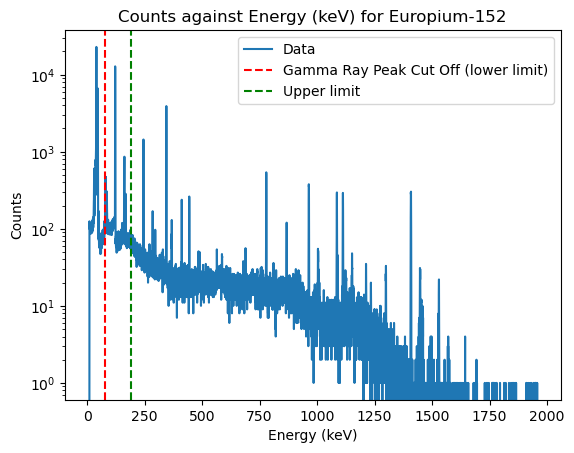

In [147]:
plt.semilogy(e,c, label = 'Data')
plt.axvline(77, color='r', linestyle = '--', label = 'Gamma Ray Peak Cut Off (lower limit)')
plt.axvline(191.1938, color='g', linestyle = '--', label = 'Upper limit ')
plt.title('Counts against Energy (keV) for Europium-152')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.savefig('Eu152 Data.PNG')
plt.legend()
plt.show()

Figure 1: The counts of the Eu-152 source in dependence of the energy (in keV). The blue lines shows the data, with prominent peaks consistently appearing throughout the distribution. The dashed red line represents the 77keV limit - peaks below this threshold represent X-Rays and not gamma peaks, which we are investigating. The dashed green line represents the upper-limit of the channel region we are investigationg (1-800).

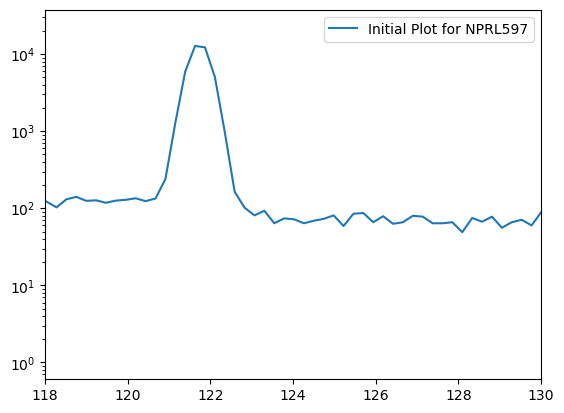

In [148]:
lower_limit = 0.2393*(450)-0.2464
upper_limit = 0.2393*(1000)-0.2464
plt.semilogy(e,c, label = 'Initial Plot for NPRL597')
plt.legend()
#plt.axvline(77, color='r', linestyle = '--', label = 'Gamma Ray Peak Cut Off')
plt.xlim(118, 130)
plt.show()

In [149]:
print(e[495])
print(e[525])

118.5159077
125.6990986


In [150]:
e1 = e[495:525]
c1=c[495:525]
dy = np.sqrt(c1)

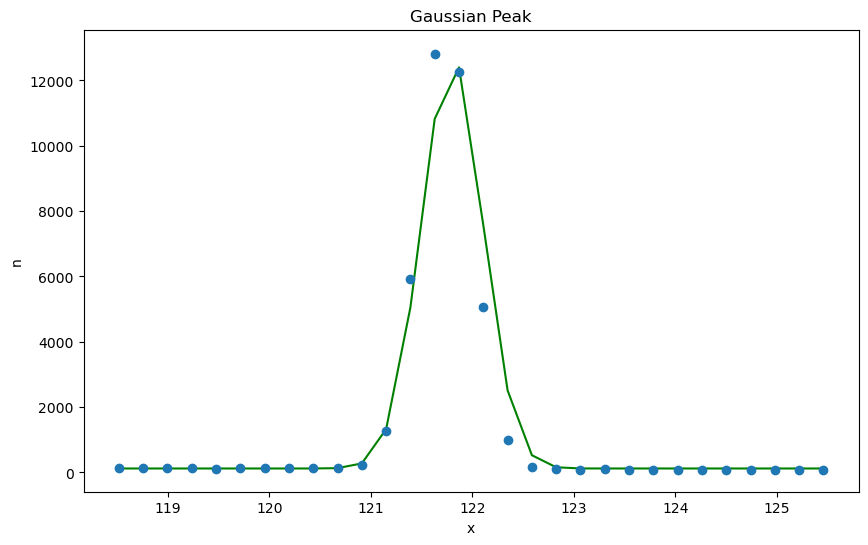

Correlation matrix is:
[[ 1.   -0.91 -0.5  -0.53  0.5 ]
 [-0.91  1.    0.63  0.64 -0.63]
 [-0.5   0.63  1.    1.   -1.  ]
 [-0.53  0.64  1.    1.   -1.  ]
 [ 0.5  -0.63 -1.   -1.    1.  ]]
Amplitude (A) = 13786.0951 +- 97.2869
Mean (mu) = 121.7331 +- 0.0015
Standard Deviation (sigma) = 0.2624 +- 0.0012
Constant (background) = 103.0805 +- 2.3961
Gradient (background) = -11.0752 +- 0.9778


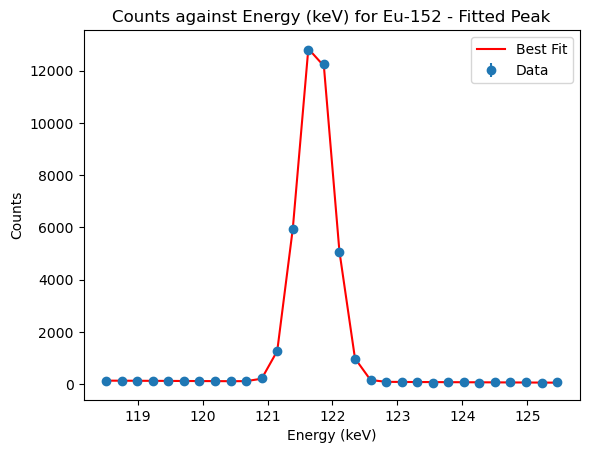

In [151]:
from scipy.optimize import curve_fit
initial_parameters = [0,120,12600,121.8,0.3]
dy = np.sqrt(c1)

plt.figure(figsize=(10, 6))
plt.errorbar(e1, c1, yerr=dy, fmt='o', label='Data')
plt.plot(e1, Gaussian_Peak(e1,0,120,12600,121.8,0.3), label='Initial Guess', color = 'g')
plt.title("Gaussian Peak")
plt.xlabel("x")
plt.ylabel("n")
plt.show()
popt, pcov = curve_fit(Gaussian_Peak, e1, c1, sigma=dy, p0=initial_parameters,maxfev=10000)
m_fit, const_fit, A_fit, mu_fit, sigma_fit = popt

with np.printoptions(precision=2):
    pcorr = np.corrcoef(pcov, rowvar=False)
    print("Correlation matrix is:")
    print(pcorr)
    
m_sigma, const_sigma, A_sigma, mu_sigma, sigma_sigma = np.sqrt(np.diag(pcov))

print("Amplitude (A) = {:.4f} +- {:.4f}".format(A_fit, A_sigma))
print("Mean (mu) = {:.4f} +- {:.4f}".format(mu_fit, mu_sigma))
print("Standard Deviation (sigma) = {:.4f} +- {:.4f}".format(sigma_fit, sigma_sigma))
print("Constant (background) = {:.4f} +- {:.4f}".format(const_fit, const_sigma))
print("Gradient (background) = {:.4f} +- {:.4f}".format(m_fit, m_sigma))  

plt.plot(e1, Gaussian_Peak(e1,m_fit, const_fit, A_fit, mu_fit, sigma_fit), label='Best Fit', color = 'r')
plt.errorbar(e1, c1, yerr=dy, fmt='o', label='Data')
plt.title('Counts against Energy (keV) for Eu-152 - Fitted Peak')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.savefig('Eu-152 Fitted Peak.PNG')
plt.legend()
plt.show()

Figure 5: The number of counts of the Eu-152 source, in dependence of the energy (keV), for the most prominent peak within our channel region. The red line shows the fitted data in accordance to a combined model containing a Gaussian and Linear relationship, and the blue dots showing the datapoints with the uncertainty. The parameters we are interested in $\mu$ and $\sigma$, were found to be (121.7331 +- 0.0015)keV and (0.2624 +- 0.0012)keV, respectively.

In [152]:
print(e1)
print(c1)

[118.5159077 118.7553474 118.9947871 119.2342268 119.4736665 119.7131062
 119.9525459 120.1919856 120.4314253 120.670865  120.9103047 121.1497444
 121.3891841 121.6286238 121.8680635 122.1075032 122.3469429 122.5863826
 122.8258222 123.0652619 123.3047016 123.5441413 123.783581  124.0230207
 124.2624604 124.5019001 124.7413398 124.9807795 125.2202192 125.4596589]
[  131   141   125   127   118   126   129   135   124   134   239  1274
  5928 12796 12262  5065   978   164   102    81    93    64    74    72
    64    69    73    81    59    85]


In [153]:
Gaussian_Peak(122,0,120,0,121.8,0.3)

120.0

In [164]:
FWHM_ = FWHM(0.2624)
print('FWHM of the first peak is:', FWHM_)

FWHM of the first peak is: 0.6179047798161211


### Integration Window (B)

In [165]:
lower_limit = 121.7331 - FWHM_/2
upper_limit = 121.7331 + FWHM_/2
print('The lower limit is:', lower_limit, 'and the upper limit is:', upper_limit)
integration1 = spi.quad(Gaussian_Peak, lower_limit, upper_limit,args=(0,120,0,121.8,0.3))
print('The number of background counts of the most prominent peak is:', integration1[0]/0.2393) 

The lower limit is: 121.42414761009194 and the upper limit is: 122.04205238990805
The number of background counts of the most prominent peak is: 309.8561369742324


### Integration Window (C)

In [162]:
lower_limit = 121.7331 - first_FWHM/2
upper_limit = 121.7331 + first_FWHM/2
print('The lower limit is:', lower_limit, 'and the upper limit is:', upper_limit)
integration_1 = spi.quad(Gaussian_Peak, lower_limit, upper_limit,args=(0,120,12600,121.8,0.3))  #Include the peak value
print('The number of counts due to the sample, for the most prominent peak is:',integration_1[0]/0.2393)

The lower limit is: 121.42344116407843 and the upper limit is: 122.04275883592156
The number of counts due to the sample, for the most prominent peak is: 27476.415690400085


### N

In [157]:
N = -309.8561369742324 + 27476.415690400085
print('Therefore, the net number of counts is:', N)

Therefore, the net number of counts is: 27166.559553425854


### $
L_{C}
$

In [158]:
L_C = 2.33*np.sqrt(309.8561369742324)
print('The critical limit for the most prominent peak is:', L_C)

The critical limit for the most prominent peak is: 41.01436311853947


### $
L_{D}
$

In [159]:
L_D = 2.71+(4.65*np.sqrt(309.8561369742324))
print('The detection limit of the most prominent peak is:', L_D)

The detection limit of the most prominent peak is: 84.5626989275573


In [160]:
#Energy is x and efficiency is y
m = (0.005067-0.042293)/(1836.1-59.6)
c = 0.005067-m*(1836.1)
#y=mx+c
y = 121.8*m + c
print('The efficiency of this peak (interpolated) is:',y)

The efficiency of this peak (interpolated) is: 0.040989618519560934


### MDA

In [161]:
MDA = L_D/(299.8*0.040989618519560934*1)
print('The MDA of this peak is:', MDA)

The MDA of this peak is: 6.881344978305347


# <u> 4. Discussion

## 4.1 - NPRL597

As Figure 2 shows, there are three prominent peaks within the channel region we wish to investigate. By utilising the combined function of a Gaussian and Linear relationship, we were able to fit three of these peaks.
<br>The first peak, fitted in Figure 3, returns an amplitude of (13786.0951 +- 97.2869), a mean of (121.7331 +- 0.0015)keV, and a standard deviation of (0.2624 +- 0.0012)keV. 
<br>
As Figure 4 shows, the fit of our second peak returns an amplitude of (342.0438 +- 22.7084), a mean of (136.3891 +- 0.0179)keV, and a standard deviation of (0.2613 +- 0.0175)keV. 
<br> Figure 5 returns the fit of the third peak, with an amplitude of (13786.0951 +- 97.2869), a mean of (1103.0805 +- 2.3961)keV, and a standard deviation of (0.2624 +- 0.0012)keV.

Using these parameters, we were then able to integrate between $\mu \pm \frac{FWHM}{2}$, where FWHM is the Full Width Half Maximum, found by the equation in our code above. Two integrations were made, one with our Gaussian parameters, and one with our linear parameters only. This would then allow us to find the counts of the peak region (C) and the background counts (B), respecitvely. Using the equation for the Net Counts (N), we found that for each peak, the net counts was 7050.1,  243.8, and 13.1, respectively. This allowed us to then find the critical limit for each peak: 57.2, 56.3, and 54.8 counts, respectively. Then, the detection limit was calculated for each peak, returning: 116.9, 115.0, and 112.0, respectively. For NPRL597, the live time was 1800 seconds, and the efficiency of the first and third peak was 0.051100 and 0.042985, respecitively - corresponing to the 122.1keV and 165.9keV peaks. For the second peak, we assumed there was a linear relationship for the efficiencies, and thus used the table given in the project script to calculate the gradient and intercept following a y=mx+c relationship, to then calculate the efficiency (y) of the second peak. This value was calulated to be 0.040684. Finally, assuming an efficiency of one, we calculated the MDA of the three peaks to be: 1.27Bq, 1.57Bq, and 1.45Bq, respectively. The limited variation here is reasonable as if we look at Figure 2, we find that the background is relatively stable.

Looking at our values of N (the net counts) of each peak, we can see that those of the first and second peak exceed their critical limits, and thus these peaks are stasticially signficant. However, the net counts of the third peak are less than that of the critical limit, and thus is statsistically insignificant and we can be 95% certain it is not a peak. In terms of our detection limit, the first and second peaks a number of net counts that exceed the detection limit, thus our number of counts has exceeded the mnimum level that is required for detection, and so a peak is reliably detected. Since our third peak has a net number of counts that falls below the detection limit, we can say that our measured number of counts falls below the minimum limit required for detection. This reinforces that our third peak in this channel region is statistically insignificant and a lack in confidence of detection.

The MDA values of the NRPL597 are rather small, ranging from 1.2-1.5. This indicates that the setup is sensitive enough such that we are able to reliably detect low levels of radioactivity and discerning relatively small amounts of specific radioactive elements assosciated with specific gamma ray peaks.  

## 4.2 - Eu-152

For Europium-152, a similar process was followed as for the NPRL597, however, we investigated only the 1-800 channel region, analysing only the most prominent peak. Figure 5 shows our fitted peak, returning an amplitude of (13786.0951 +- 97.2869) counts, a mean of (121.7331 +- 0.0015)keV, and a standard deviation of (0.2624 +- 0.0012)keV. The number of counts in the peak and the background counts were found to be: 27476.4 and 309.9 , respectively - thus the net number of counts for Eu-152 was found to be 27167. The critical limit was then calulcated as 41.0, with a detection limit of 84.6. Again, to find the efficiency of our energy peak, we used the linear interpolation method as used for NPRL597, returning an efficiency of 0.04099.
<br> The live time of Eu-152 was found to be 299.8 seconds, from our project script. Using this and our calculated efficiency, assuming a branching ratio of 1 we found the MDA of our prominent peak was 6.88Bq.

Taking our value of the critical limit into consideration, we can see that our net number of counts exceeds this, and thus our peak is statistically significant. Looking to the detection limit, our net number of counts exceeds this and so again, we have a reliable detection of a peak. Since our net number of counts exceeds both the detection and criticial limits, we not only have a measurement which is detectable, but also a measurement which exceeds the threshold for statistical significance. The net number of counts is considered significant enough to confidently distinguish it from the background noise and affirm the presence of the Eu-152.
<br>Our MDA of the EU-152 is higher than that of the NPRL597, indicating that we have a more moderate sensitivity compared to the NPRL597 and thus when compared to the MDA of the NPRL597, the sensitivity of the detector to lower-levels of radioactivity is not as good. 

At 122.1keV, we have a characteristic peak of not only Eu-152, but also of Plutionium. A way to combat this issue would be to compare more peaks of each radioactive substance to determine the substance being analysed, or to use a detector with a higher resolution, along with different spectroscopy software. 
<br> An improvement with regards to our method which can be applied to not only the Eu-152, but to both data sets, is to utilise a Lorentzian distribution. Lorentzian distributions have narrower peaks, and thus may be more suited to gamma peaks shown in this data, rather than utilising Gaussian distributions. Lorentzian distributions also account for asymmetry in peaks, which is common in gamma ray spectroscopy. 

# 5. Conclusion

Upon examining the net counts of each peak, we observed that the first and second peaks surpassed their critical limits, indicating statistical significance. Conversely, the net counts of the third peak fell below the critical limit, rendering it statistically insignificant. With respect to the detection limit, the first and second peaks exceeded it, confirming reliable peak detection, however, the net counts of the third peak fell below the detection limit, reinforcing its statistical insignificance and lower confidence in detection.
<br>For Eu-152, the number of net counts for Eu-152 were found to be 27167, surpassing the critical limit of 41.0 and the detection limit of 84.6. The MDA for the prominent peak was calculated as 6.88Bq with a live time of 299.8 seconds and an efficiency of 0.04099.
<br>The net counts exceeding both critical and detection limits for Eu-152 confirm a statistically significant and reliably detected peak, distinguishing it confidently from background noise. However, compared to NPRL597, the MDA of Eu-152 indicates a moderately lower sensitivity.

One issue encountered with our analysis of the Eu-152 is that there is still the question of if there is Plutionium present. At 122.1 keV, there is a characteristi peak for both Eu-152 and Plutonium. To address this issue, comparing more peaks of each radioactive substance or employing a detector with higher resolution and different spectroscopy software could enhance substance identification, and thus this would explain the risk of the radioactive waste if plutionium was found to be present. An improvement we could potentially apply to our method is that Lorentzian distributions could be utilised, rather than Gaussian distributions, due to their inherent narrow peaks and accountability of asymmetry.